# Investment Risk and Return Analysis: The Sharpe Ratio 
## Stocks vs S&P 500

This Python notebook analyzes and compares the profitability and risk of different investments by utilizing the Sharpe Ratio, a financial metric that allows for the assessment of investment returns relative to their associated risk, measured by the standard deviation of returns. 

Sharpe Ratio = (Expected Return of the Investment - Benchmark Risk-Free Rate of Return ) / Standard Deviation (or Risk) of the Investment

The project uses pandas to work with real financial data, providing insights into how to evaluate investments based on this important financial measure.

- Stocks: Amazon and Facebook (2016 data)
- Benchmark: S&P 500 - measures the performance of the 500 largest stocks in the US.

## Importing Libraries and Reading the Data

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('datasets/stock_data.csv', parse_dates=['Date'],index_col='Date').dropna()

benchmark_data = pd.read_csv('datasets/benchmark_data.csv', parse_dates=['Date'],index_col='Date').dropna() 

## Glancing at the Data
Look at the number of observations and variables

In [2]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()
print(stock_data.head())

# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
benchmark_data.head()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


## Summarizing and Visualizing the Stock Data

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


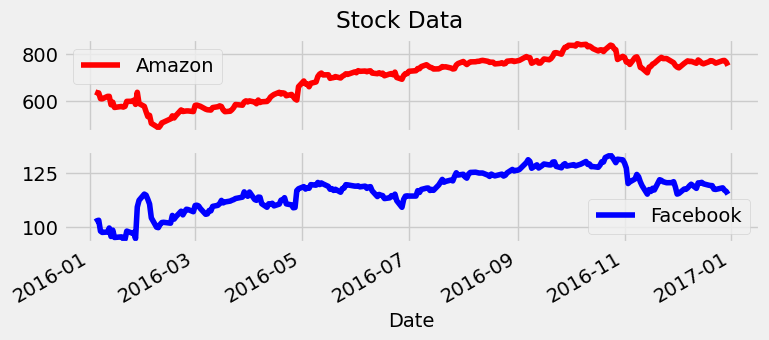

In [5]:
# visualize the stock_data
stock_data.plot(title='Stock Data', subplots=True, figsize=(8, 3), color=['red', 'blue']);

# summarize the stock_data
stock_data.describe()

## Summarizing and Visualizing the Benchmark S&P 500 Data

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


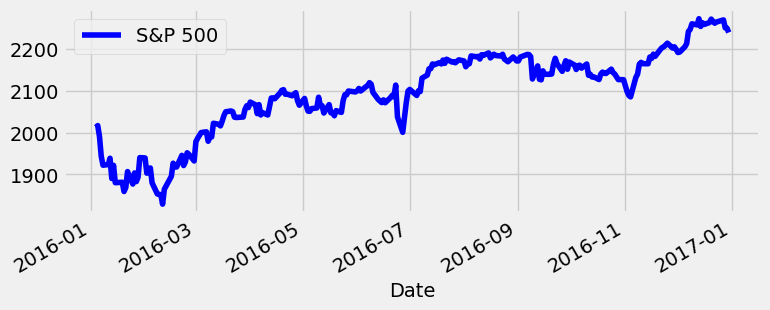

In [6]:
# plot the benchmark_data
benchmark_data.plot(figsize=(8, 3), color=['blue'])

# summarize the benchmark_data
benchmark_data.describe()


## Daily Stock Returns 

Difference in returns between the two investment opportunities under consideration.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


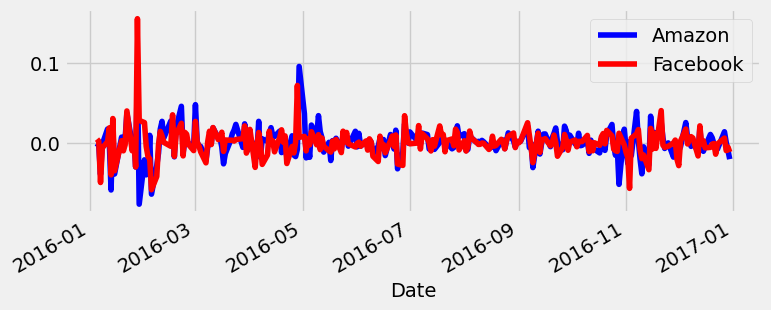

In [7]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot(figsize=(8, 3), color=['blue', 'red'])

# summarize the daily returns
stock_returns.describe()


## Daily S&P 500 returns

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

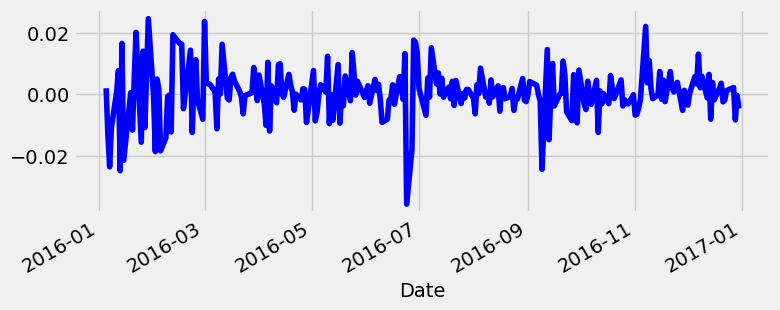

In [8]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot(figsize=(8, 3), color=['blue'])

# summarize the daily returns
sp_returns.describe()


## Calculating Excess Returns for Stock vs. S&P 500

The relative performance of stocks vs. the S&P 500 benchmark - calculated as the difference in returns between stock_returns and sp_returns for each day

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


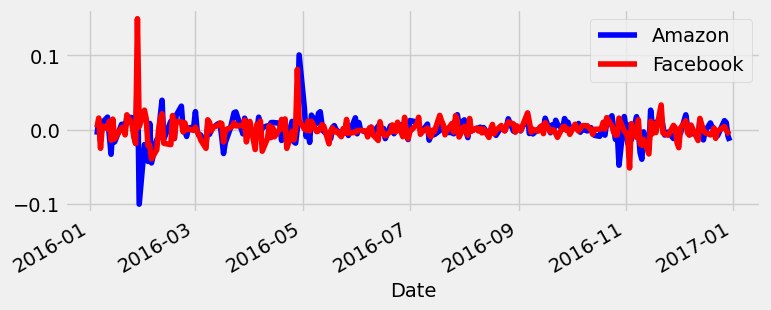

In [9]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot(figsize=(8, 3), color=['blue', 'red'])

# summarize the excess_returns
excess_returns.describe()


## The Average Difference in Daily Returns Stocks vs S&P 500

Step 1 of computing the Sharpe Ratio - calculate the average of the excess_returns. 

This tells us how much more or less the investment yields per day compared to the benchmark.

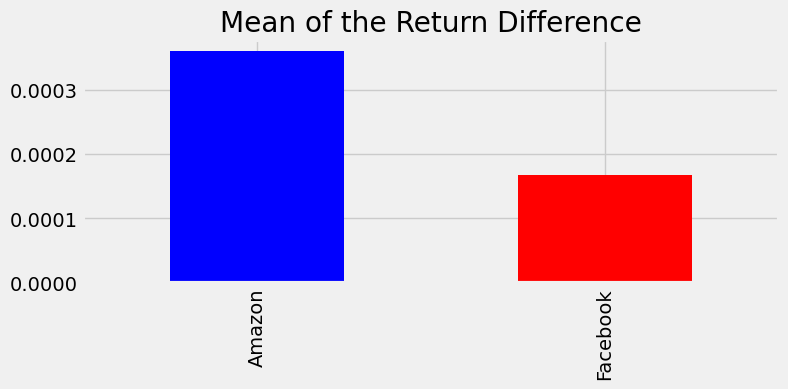

In [10]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference', figsize=(8, 3), color=['blue', 'red']);


## Standard Deviation of the Return Difference

Step 2 of computing the Sharpe Ratio - calculate the standard deviation (or risk) of the excess_returns. 

This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

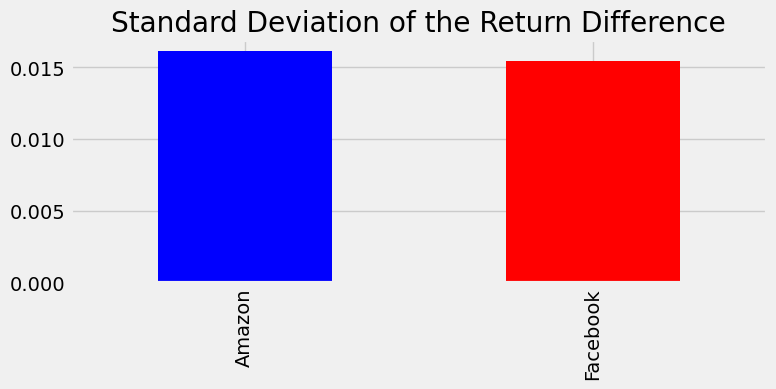

In [11]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference', figsize=(8, 3), color=['blue', 'red']);


## The Sharpe Ratio

Sharpe Ratio - compute the ratio of avg_excess_returns and sd_excess_returns. 
The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

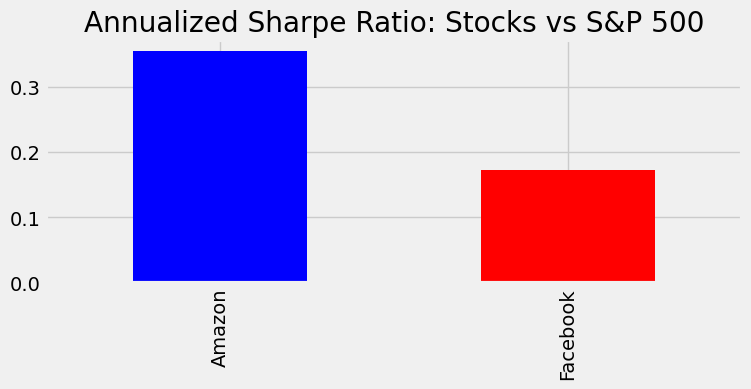

In [12]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
# 252 days = 5 trading days per week, 52 weeks, minus a few holidays
n_days = 252
annual_factor = np.sqrt(n_days)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500', figsize=(8, 3), color=['blue', 'red']);


## Conclusion

Given the two Sharpe ratios, which investment should we go for? 

In [13]:
# Pick one based on the Sharpe Ratio
buy_amazon = True
buy_facebook = False

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.

##### In 2016, Amazon had a Sharpe ratio twice as high as Facebook. 
##### This means that an investment in Amazon returned twice as much compared to the S&P 500 for each unit of risk an investor would have assumed. 